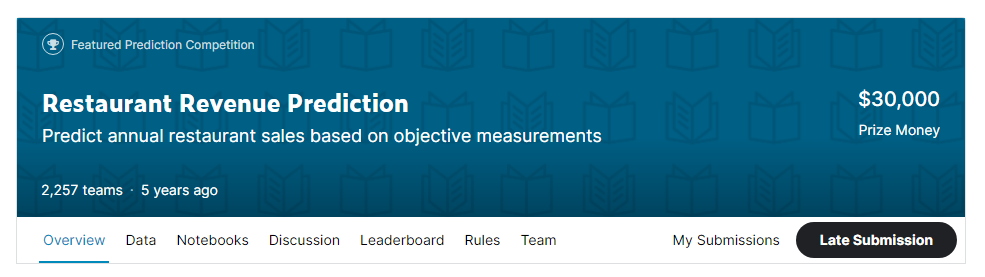

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from yellowbrick.regressor import AlphaSelection
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE

In [124]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submit = pd.read_csv('sampleSubmission.csv')

print(train.shape)
print(test.shape)

(137, 43)
(100000, 42)


In [125]:
train.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [126]:
test.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,...,2.0,3.0,0,0,0,0,0,0,0,0
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
3,3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,...,2.0,3.0,0,4,0,0,0,0,0,0
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,...,5.0,3.0,0,0,0,0,0,0,0,0


In [127]:
sample_submit.head()

,Id,Prediction
0,0,4453532.6
1,1,4453532.6
2,2,4453532.6
3,3,4453532.6
4,4,4453532.6


In [128]:
Id = test['Id']

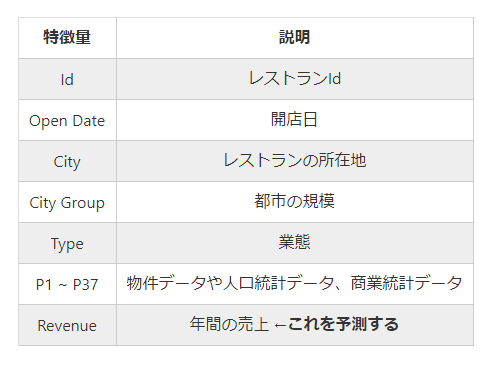

In [129]:
y = train.revenue
train = train[[col for col in train.columns if col != 'revenue']]

print(train.shape)
print(test.shape)
y[:5]

(137, 42)
(100000, 42)


0    5653753.0
1    6923131.0
2    2055379.0
3    2675511.0
4    4316715.0
Name: revenue, dtype: float64

In [130]:
X = pd.concat([train, test], axis=0)

print(X.shape)
X.head(5)

(100137, 42)


,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,2.0,3.0,5,3,4,5,5,4,3,4
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,3.0,0,0,0,0,0,0,0,0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,1.0,3.0,0,0,0,0,0,0,0,0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,2.5,7.5,25,12,10,6,18,12,12,6
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,1.0,3.0,5,1,3,2,3,4,3,3


In [131]:
print(X.isnull().sum()[:5])
print('total_null:',X.isnull().sum().sum())

Id            0
Open Date     0
City          0
City Group    0
Type          0
dtype: int64
total_null: 0


In [132]:
numerical_col = [col for col in X.columns if X[col].dtype != 'object']
categorical_col = [col for col in X.columns if X[col].dtype == 'object']

print(numerical_col[:5])
print(categorical_col[:5])
print(len(numerical_col))
print(len(categorical_col))

['Id', 'P1', 'P2', 'P3', 'P4']
['Open Date', 'City', 'City Group', 'Type']
38
4


In [133]:
X_num = X[numerical_col]
X_cat = X[categorical_col]

print(X_num.shape)
print(X_cat.shape)
print(X_cat['City Group'].unique())
print(X_cat['City'].unique()[:10])
print(X_cat['Type'].unique())
X_cat.head()

(100137, 38)
(100137, 4)
['Big Cities' 'Other']
['İstanbul' 'Ankara' 'Diyarbakır' 'Tokat' 'Gaziantep' 'Afyonkarahisar'
 'Edirne' 'Kocaeli' 'Bursa' 'İzmir']
['IL' 'FC' 'DT' 'MB']


,Open Date,City,City Group,Type
0,07/17/1999,İstanbul,Big Cities,IL
1,02/14/2008,Ankara,Big Cities,FC
2,03/09/2013,Diyarbakır,Other,IL
3,02/02/2012,Tokat,Other,IL
4,05/09/2009,Gaziantep,Other,IL


In [134]:
def code_transform(x):
    
    if x == 'Big Cities':
        y = 0
    else:
        y = 1
        
    return y

X_cat['City Group'] = X_cat['City Group'].apply(lambda x: code_transform(x))
X_cat.head()

C:\Users\Owner\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,Open Date,City,City Group,Type
0,07/17/1999,İstanbul,0,IL
1,02/14/2008,Ankara,0,FC
2,03/09/2013,Diyarbakır,1,IL
3,02/02/2012,Tokat,1,IL
4,05/09/2009,Gaziantep,1,IL


In [135]:
X_cat = pd.get_dummies(X_cat)

print(X_num.shape)
print(X_cat.shape)
X_cat.head()

(100137, 38)
(100137, 495)


,City Group,Open Date_01/01/2000,Open Date_01/03/2013,Open Date_01/03/2014,Open Date_01/04/2014,Open Date_01/05/2000,Open Date_01/07/2000,Open Date_01/07/2011,Open Date_01/09/2010,Open Date_01/14/2011,...,City_Çanakkale,City_Çankırı,City_Çorum,City_İstanbul,City_İzmir,City_Şanlıurfa,Type_DT,Type_FC,Type_IL,Type_MB
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [136]:
X_total = pd.concat([X_num, X_cat], axis=1)

print(X_total.shape)
X_total.head()

(100137, 533)


,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,City_Çanakkale,City_Çankırı,City_Çorum,City_İstanbul,City_İzmir,City_Şanlıurfa,Type_DT,Type_FC,Type_IL,Type_MB
0,0,4,5.0,4.0,4.0,2,2,5,4,5,...,0,0,0,1,0,0,0,0,1,0
1,1,4,5.0,4.0,4.0,1,2,5,5,5,...,0,0,0,0,0,0,0,1,0,0
2,2,2,4.0,2.0,5.0,2,3,5,5,5,...,0,0,0,0,0,0,0,0,1,0
3,3,6,4.5,6.0,6.0,4,4,10,8,10,...,0,0,0,0,0,0,0,0,1,0
4,4,3,4.0,3.0,4.0,2,2,5,5,5,...,0,0,0,0,0,0,0,0,1,0


In [137]:
train_rows = train.shape[0]
X = X_total[:train_rows]

std = StandardScaler()
X = std.fit_transform(X)

y = y[:train_rows]

print(X.shape)
print(y.shape)

(137, 533)
(137,)


In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(95, 533)
(95,)
(42, 533)
(42,)


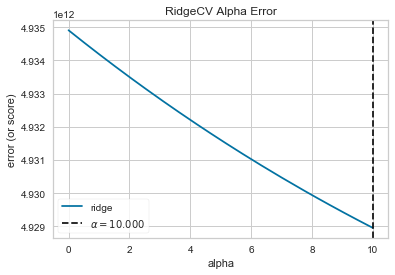

In [139]:
alphas = np.logspace(-10, 1, 500)

ridgeCV = RidgeCV(alphas = alphas)

visualizer = AlphaSelection(ridgeCV)
visualizer.fit(X_train, y_train)

visualizer.show()
plt.show()

In [140]:
ridge = Ridge(alpha=10)
ridge.fit(X_train, y_train)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [141]:
y_pred = ridge.predict(X_test)
print(y_pred[:5])

[5107335.38192938 4210288.01867848 4542569.7839358  3853382.32620265
 3527871.01394046]


In [142]:
def root_mse(y_test, y_pred):
    return np.sqrt(mean_squared_error(y_test, y_pred))
                   
print(root_mse(y_test, y_pred))

2795348.7279007444


In [143]:
X_test_submit = X_total[train_rows:]
X_test_submit = std.fit_transform(X_test_submit)

print(X_train.shape)
print(X_test_submit.shape)

(95, 533)
(100000, 533)


In [144]:
y_pred_submit = ridge.predict(X_test_submit)
print(y_pred_submit[:5])

[4317929.03576785 3227172.49785028 3871206.03541563 3517013.90770177
 4397477.86277988]


In [146]:
df_submit = pd.DataFrame(y_pred_submit, Id, columns=['Prediction'])
df_submit.head()

,Prediction
Id,
0,4.317929e+06
1,3.227172e+06
2,3.871206e+06
3,3.517014e+06
4,4.397478e+06


In [147]:
df_submit.to_csv('Restaurant_submit.csv')

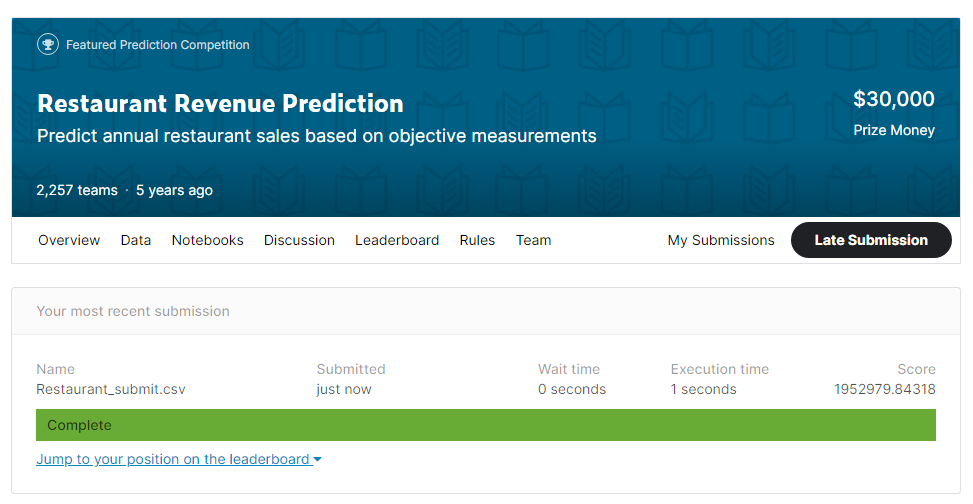